In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
def load_data(file_path):
    encodings = ['utf-8', 'cp949', 'euc-kr']
    for encoding in encodings:
        try:
            data = pd.read_csv(file_path, encoding=encoding)
            print(f"Successfully loaded with {encoding} encoding.")
            return data
        except UnicodeDecodeError:
            continue
    raise ValueError("Could not read the file with any of the specified encodings.")

# 데이터 로드
data_active = load_data('Active_DATA.csv')
data_idle = load_data('Idle_DATA.csv')

# 데이터 확인
print("Active Data Head:")
print(data_active.head(1))

print("Idle Data Head:")
print(data_idle.head(1))


Successfully loaded with utf-8 encoding.
Successfully loaded with utf-8 encoding.
Active Data Head:
   0.052244  0.052653  0.054746  0.055534  0.053016  0.047414  0.041204  \
0  0.028205  0.026116  0.024308  0.023157  0.022868  0.023356   0.02449   

   0.037934  0.040447  0.049384  ...  0.016855  0.013693  0.013113  0.014126  \
0  0.026444  0.029853  0.035588  ...  0.052435   0.03582  0.021323  0.011705   

   0.015972  0.018353  0.021147  0.023988  0.026164  1  
0  0.007841  0.008988  0.013591  0.020078  0.027229  1  

[1 rows x 96 columns]
Idle Data Head:
   0.026086  0.031805  0.042103  0.053874  0.063006  0.065939    0.0611  \
0  0.059355  0.059942  0.057376  0.052826  0.048317  0.045749  0.045959   

   0.049568  0.034649  0.020531  ...  0.016386  0.042128  0.076017   0.10742  \
0  0.048321  0.051115  0.052515  ...  0.098768   0.10503  0.099534  0.082891   

    0.1259   0.12588   0.10899  0.083227   0.05907  0  
0  0.06019  0.039495  0.028837  0.032906  0.050897  0  

[1 rows x 

C:\Users\Leekanghyeon\AppData\Local\Temp\ipykernel_9600\3166086443.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[column], label=column, fill=True)


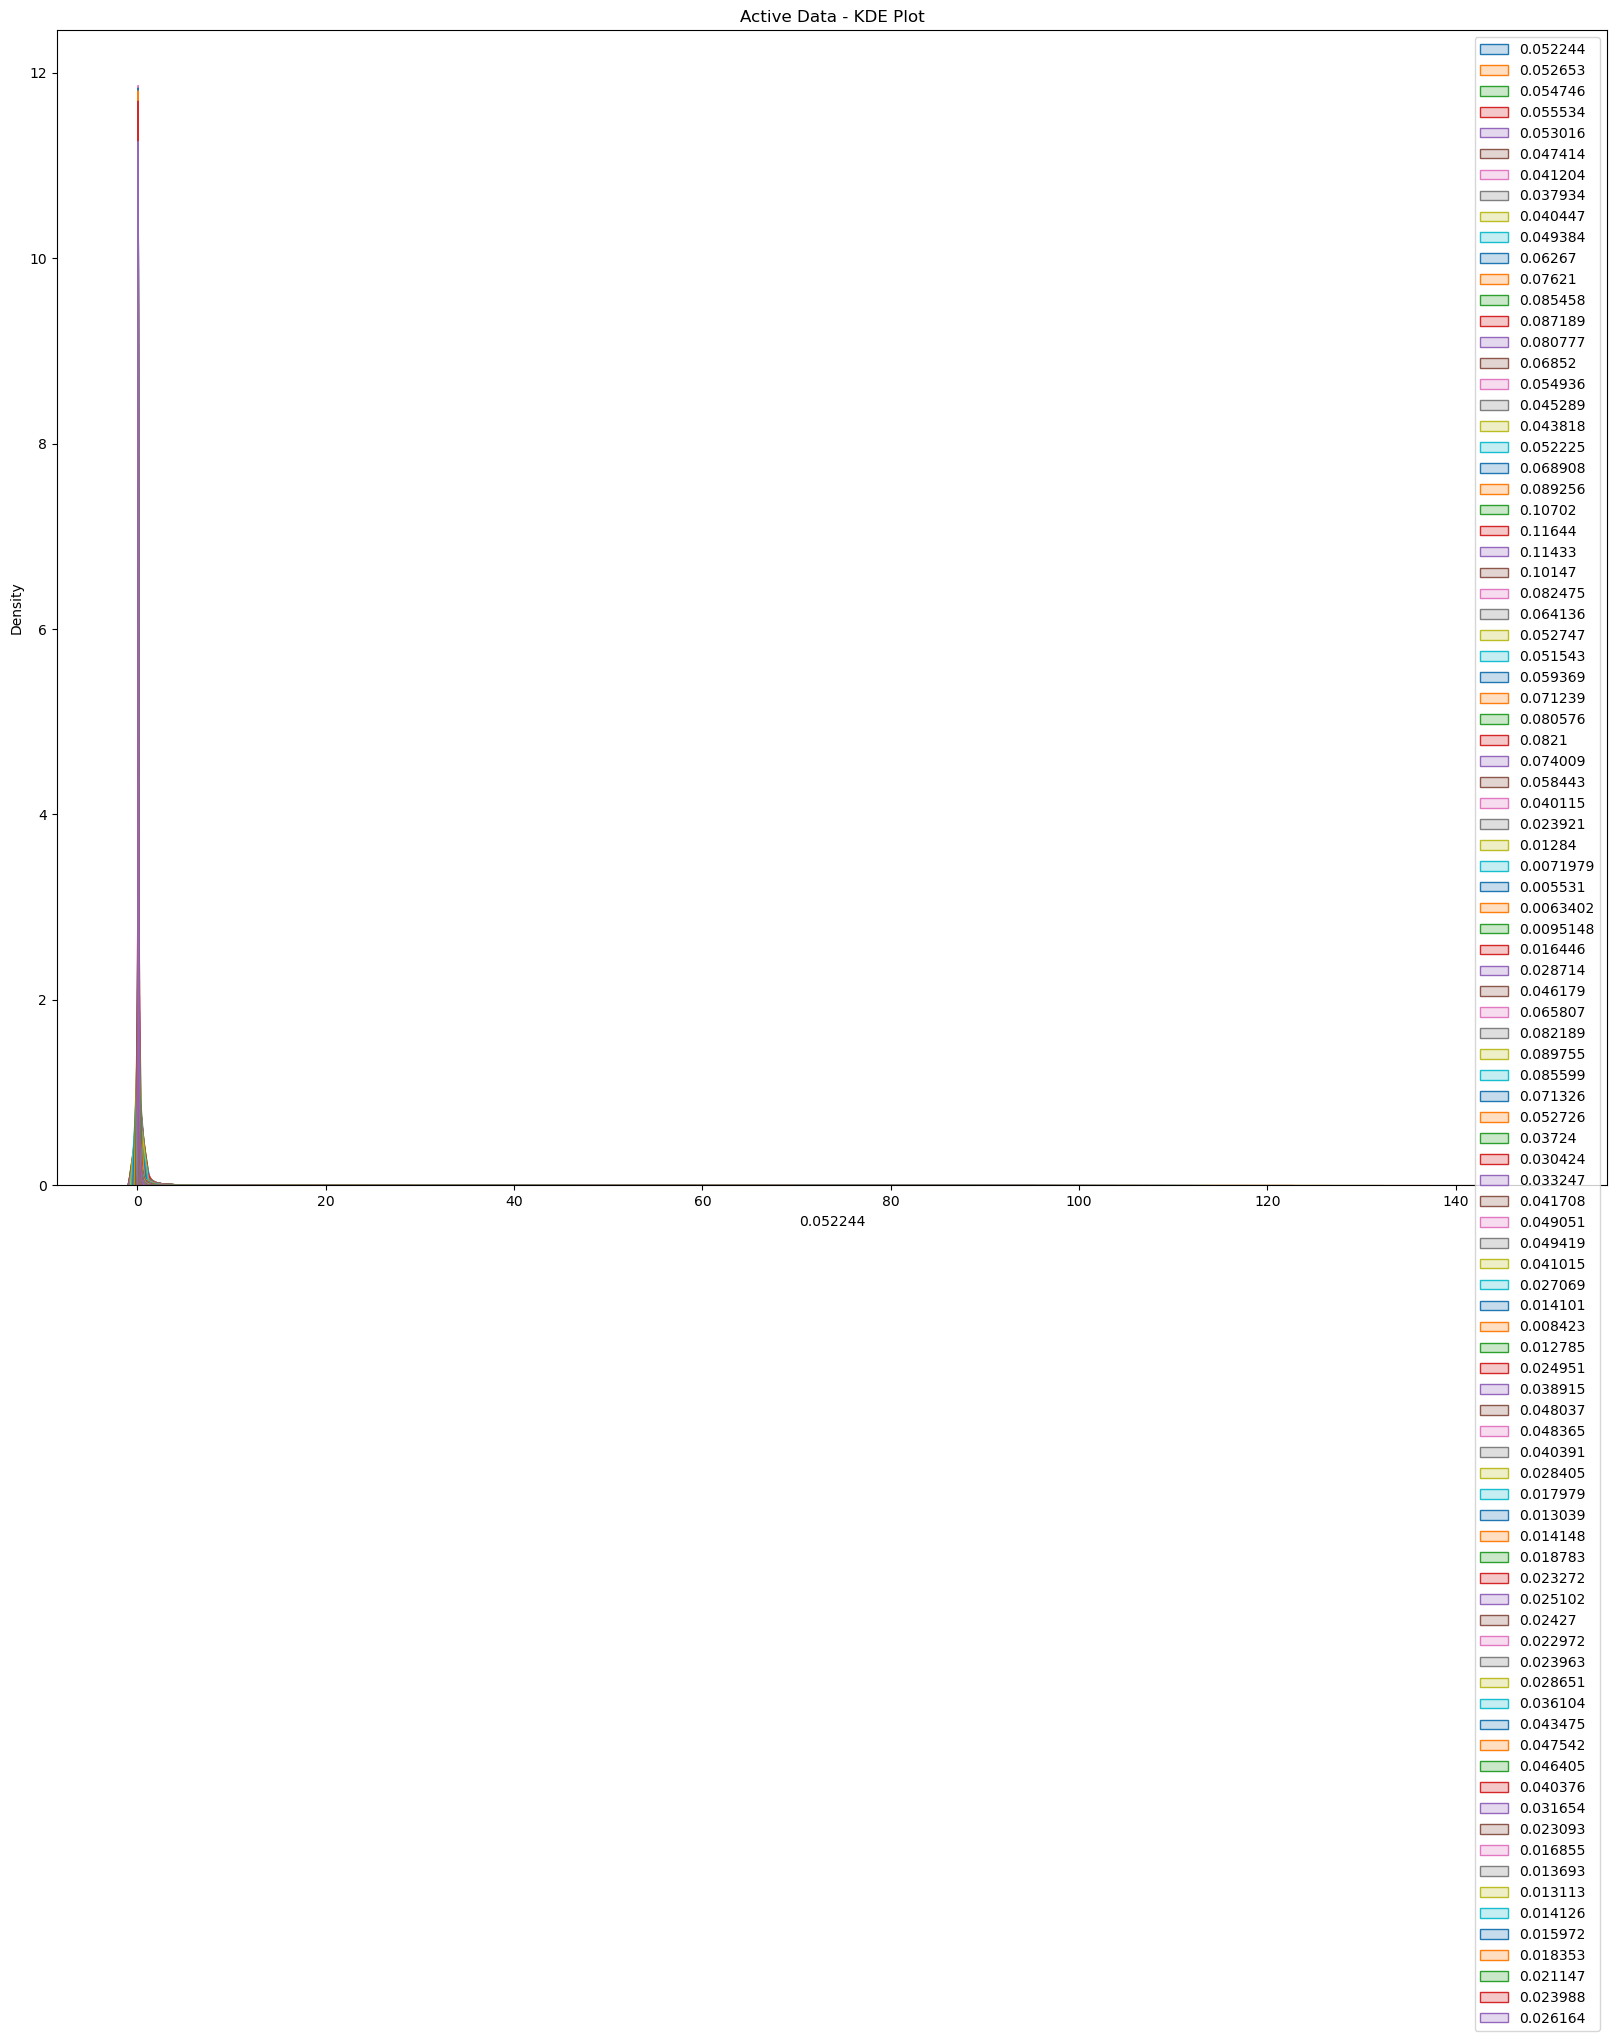

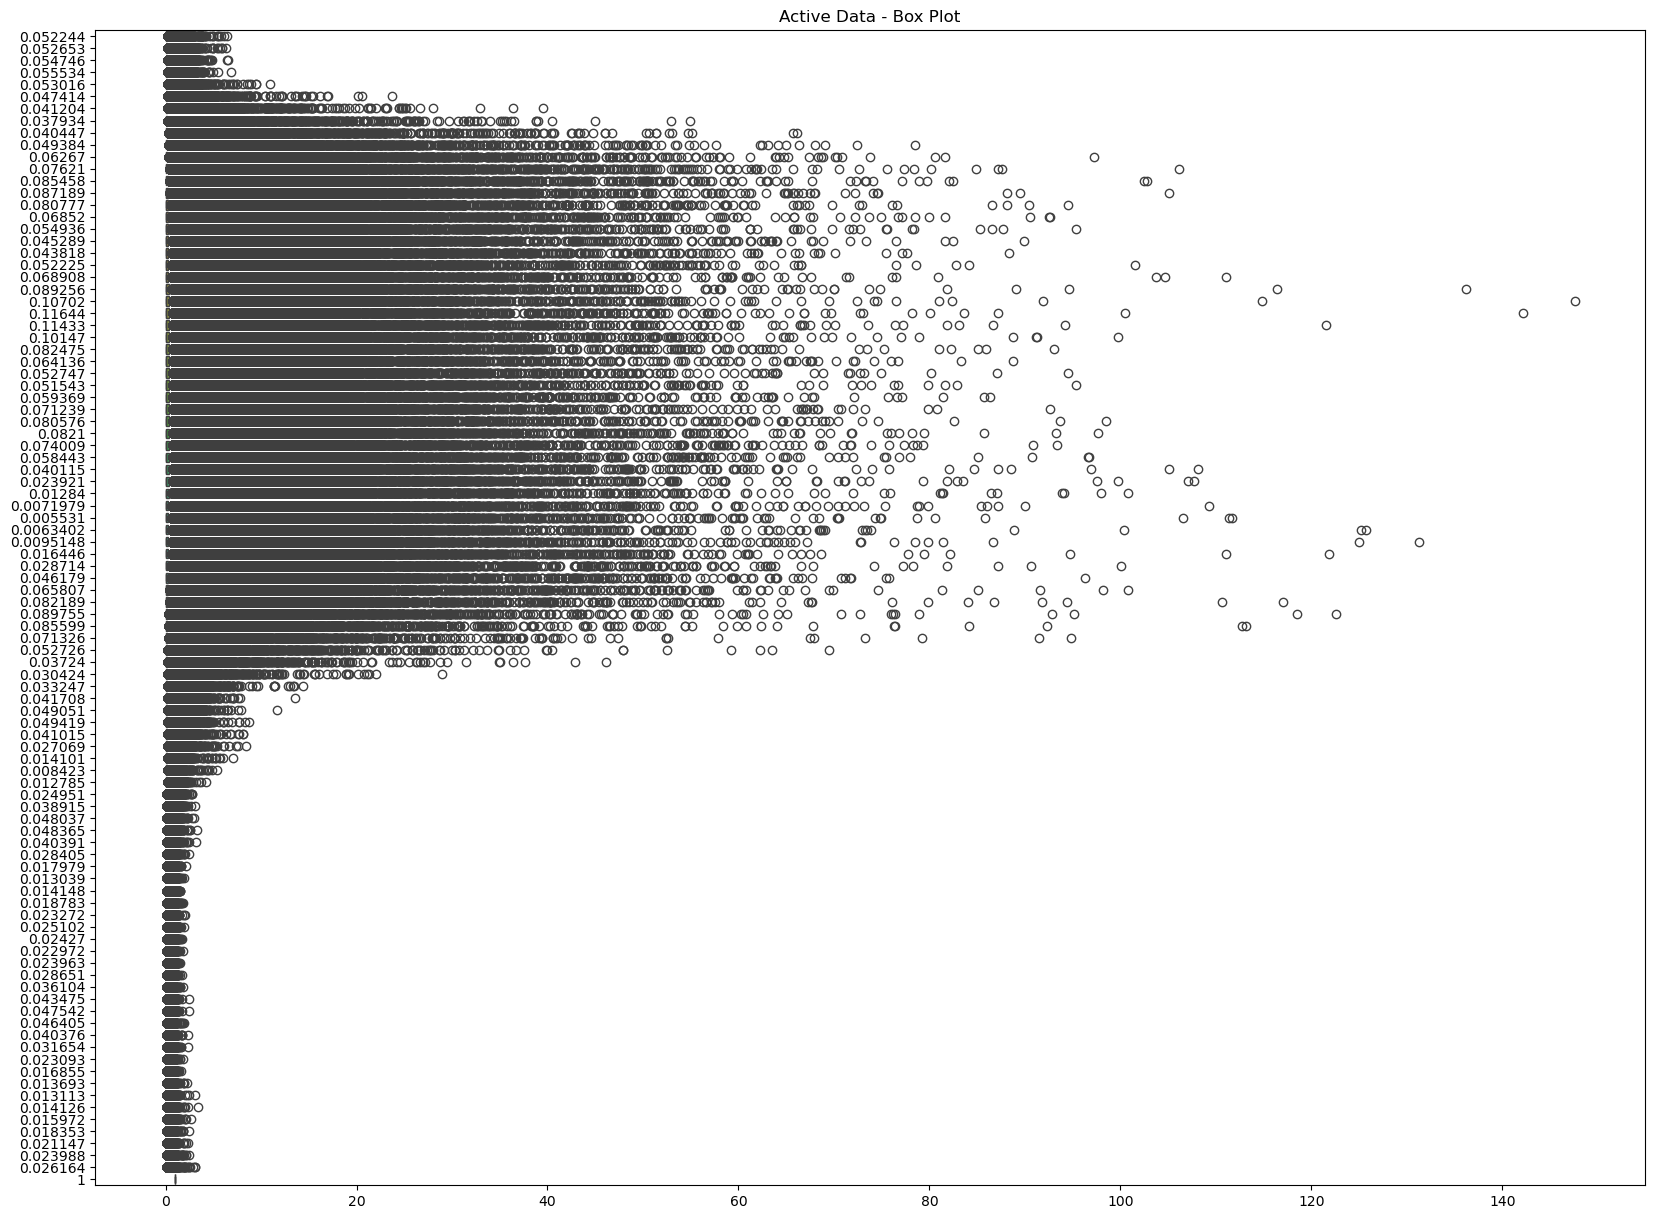

C:\Users\Leekanghyeon\AppData\Local\Temp\ipykernel_9600\3166086443.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[column], label=column, fill=True)


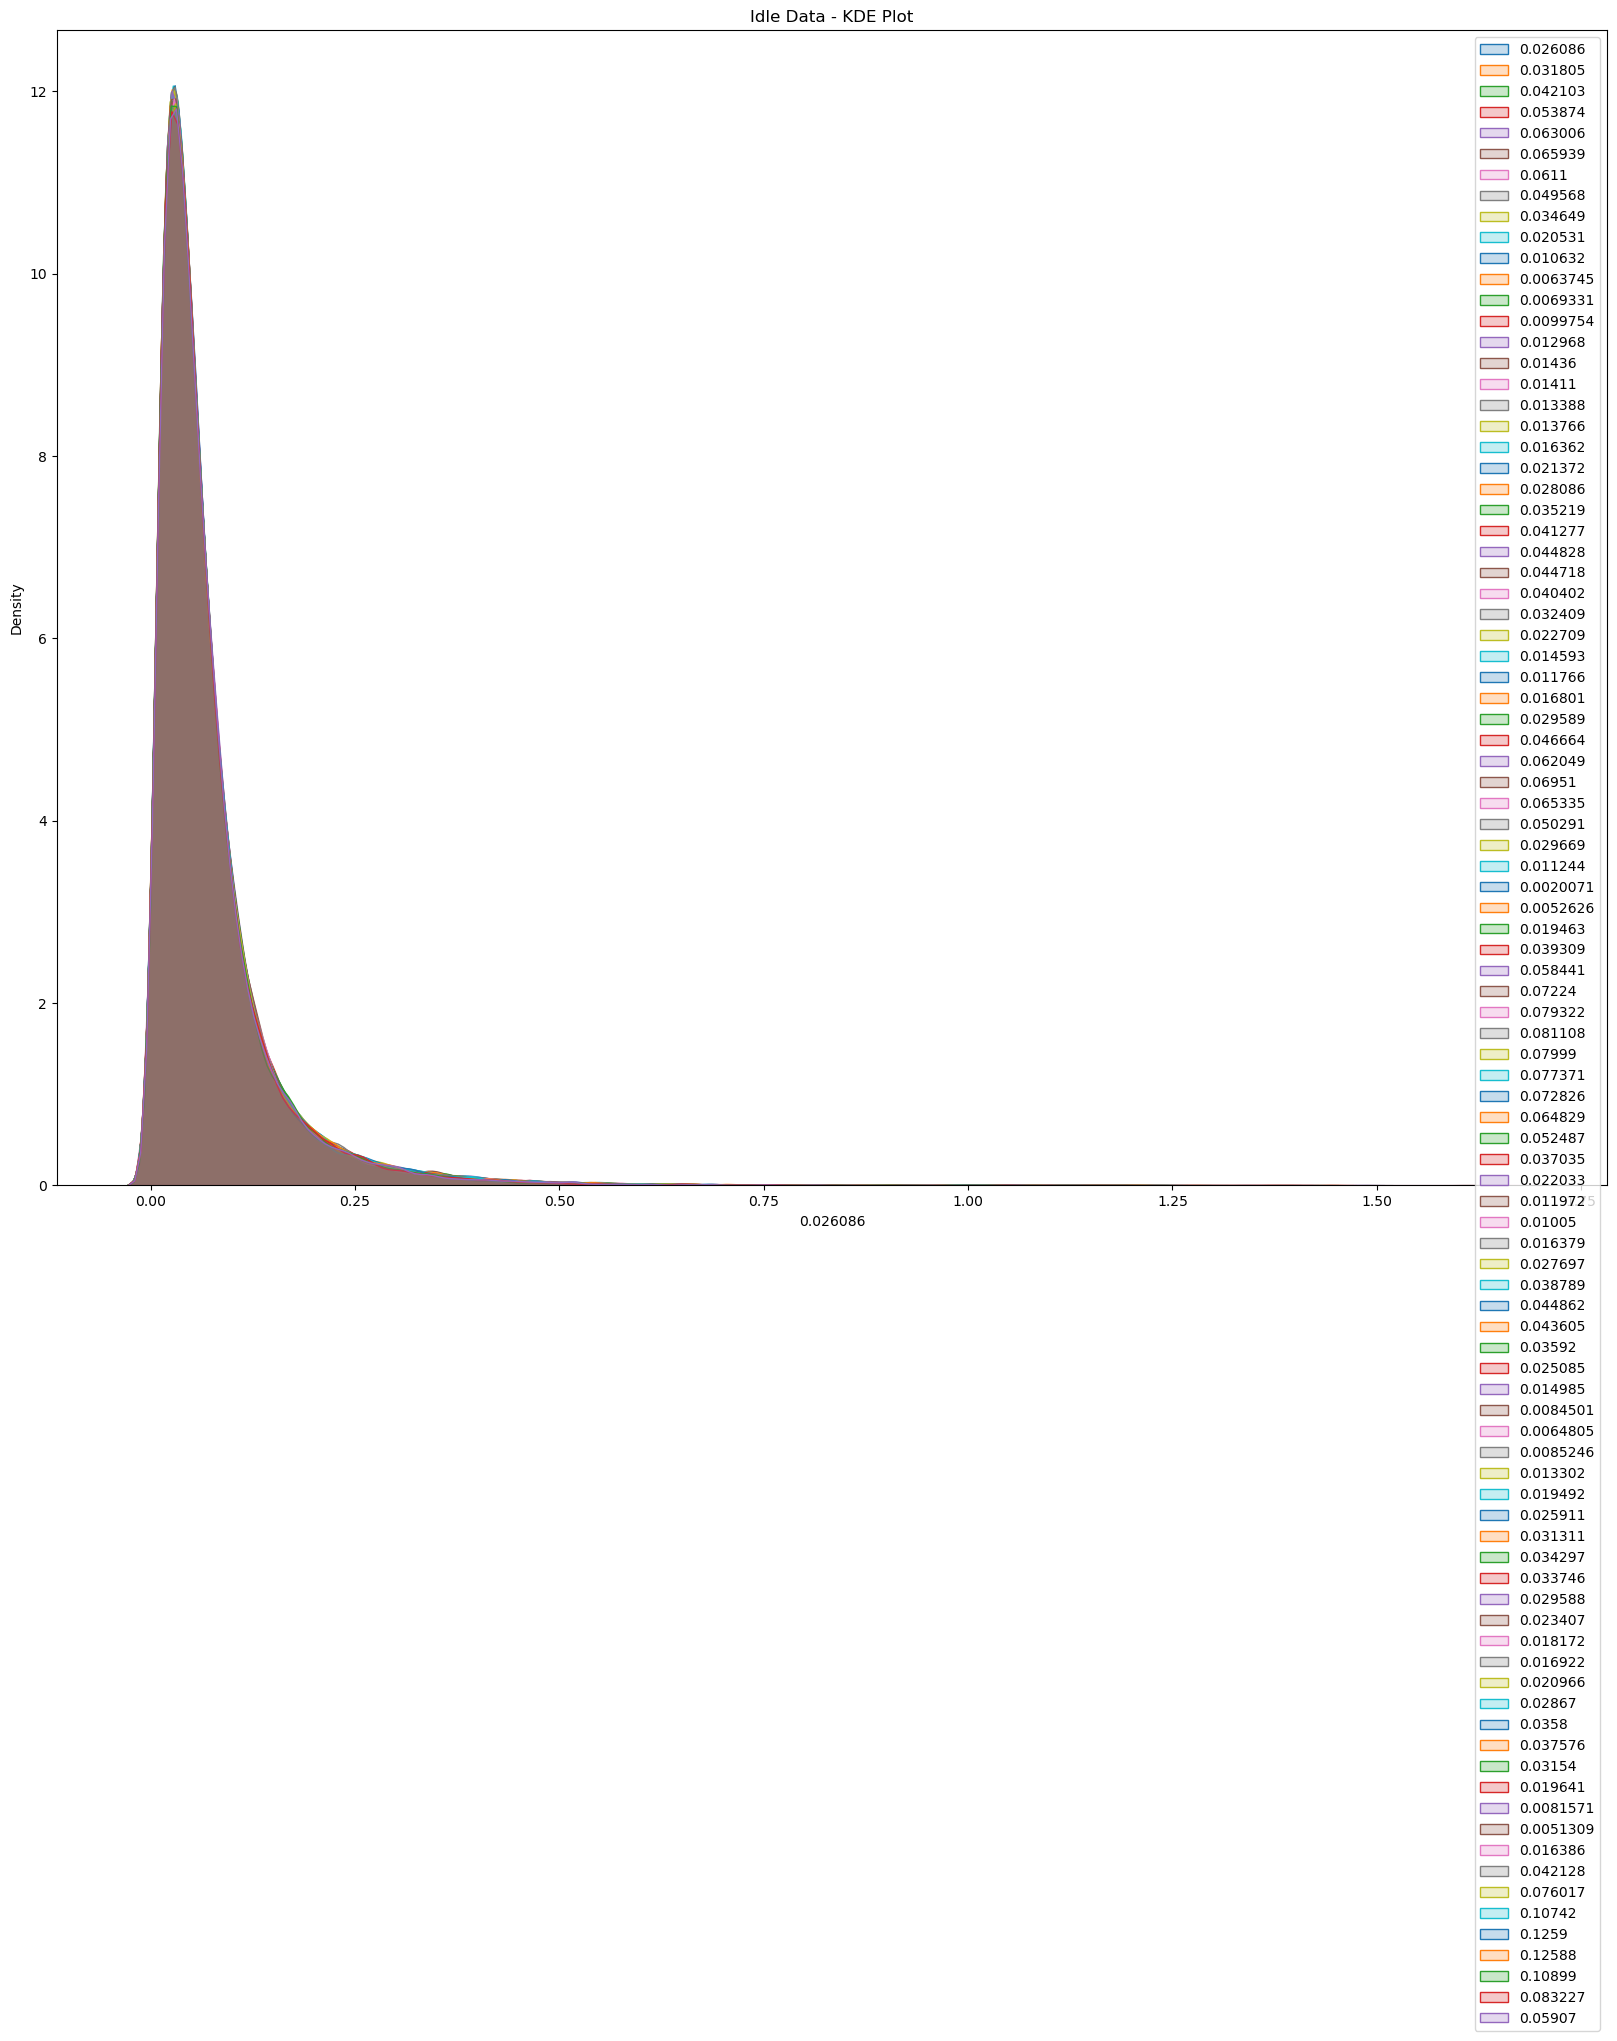

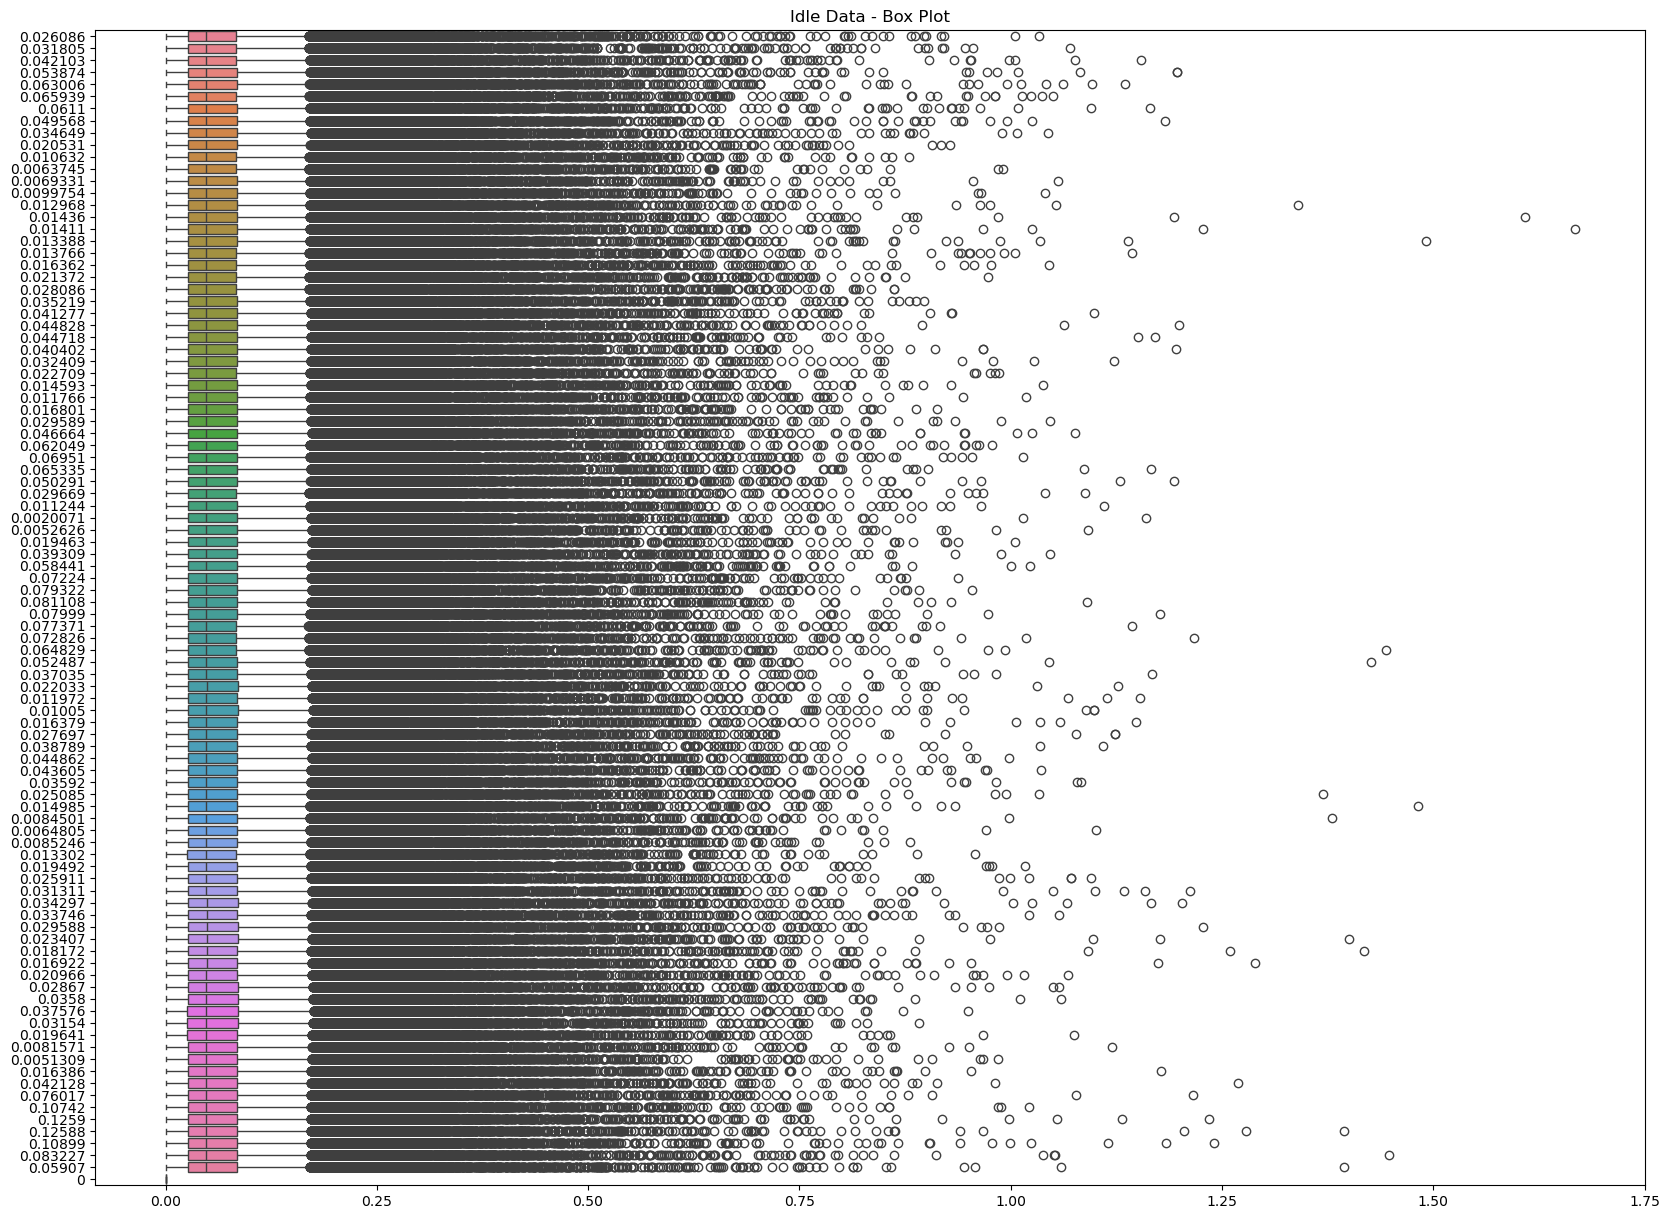

In [5]:
# 상자 그림 시각화 함수
def plot_boxplot(data, title):
    plt.figure(figsize=(20, 15))
    sns.boxplot(data=data, orient='h')
    plt.title(title)
    plt.show()

# KDE 플롯 시각화 함수
def plot_kde(data, title):
    plt.figure(figsize=(20, 15))
    for column in data.columns:
        sns.kdeplot(data[column], label=column, fill=True)
    plt.title(title)
    plt.legend()
    plt.show()

# Active 데이터 시각화
plot_kde(data_active, 'Active Data - KDE Plot')
plot_boxplot(data_active, 'Active Data - Box Plot')

# Idle 데이터 시각화
plot_kde(data_idle, 'Idle Data - KDE Plot')
plot_boxplot(data_idle, 'Idle Data - Box Plot')

In [6]:

# 컬럼 이름 설정
data_active.columns = [f'Feature_{i}' if i != len(data_active.columns) - 1 else 'Target' for i in range(len(data_active.columns))]
data_idle.columns = [f'Feature_{i}' if i != len(data_idle.columns) - 1 else 'Target' for i in range(len(data_idle.columns))]

# 데이터 확인
print("Active Data Head:")
print(data_active.head(1))
print("\nIdle Data Head:")
print(data_idle.head(1))

Active Data Head:
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   0.028205   0.026116   0.024308   0.023157   0.022868   0.023356   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_86  Feature_87  \
0    0.02449   0.026444   0.029853   0.035588  ...    0.052435     0.03582   

   Feature_88  Feature_89  Feature_90  Feature_91  Feature_92  Feature_93  \
0    0.021323    0.011705    0.007841    0.008988    0.013591    0.020078   

   Feature_94  Target  
0    0.027229       1  

[1 rows x 96 columns]

Idle Data Head:
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   0.059355   0.059942   0.057376   0.052826   0.048317   0.045749   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_86  Feature_87  \
0   0.045959   0.048321   0.051115   0.052515  ...    0.098768     0.10503   

   Feature_88  Feature_89  Feature_90  Feature_91  Feature_92  Feature_93  \
0    0.099534    0.082891     0.06019    0.039495    0.028837 

In [7]:
# 데이터 개수 맞추기
min_length = min(len(data_active), len(data_idle))
data_active_sampled = data_active.sample(n=min_length, random_state=42)
data_idle_sampled = data_idle.sample(n=min_length, random_state=42)

# 데이터 합치기
combined_data = pd.concat([data_active_sampled, data_idle_sampled], ignore_index=True)

# 데이터 섞기
shuffled_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

# 특징과 타겟 분리
X = shuffled_data.drop(columns=['Target'])
y = shuffled_data['Target']

print(X.head(3))
print(y.head(3))


   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   0.074164   0.085805   0.082455   0.065267   0.042365   0.024327   
1   0.106990   0.097936   0.070922   0.045411   0.061865   0.168190   
2   0.015418   0.021176   0.029203   0.037135   0.042694   0.045132   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_85  Feature_86  \
0   0.018596   0.025888   0.040522   0.054272  ...    0.076210    0.063651   
1   0.396960   0.743380   1.155300   1.542500  ...    0.039439    0.032446   
2   0.045913   0.048155   0.055010   0.067805  ...    0.009385    0.012496   

   Feature_87  Feature_88  Feature_89  Feature_90  Feature_91  Feature_92  \
0    0.045347    0.030520    0.026280    0.033566    0.046592    0.056251   
1    0.031702    0.037631    0.047331    0.055750    0.058181    0.052865   
2    0.019519    0.028664    0.038804    0.049063    0.058382    0.065494   

   Feature_93  Feature_94  
0    0.055553    0.043890  
1    0.042265    0.032272  
2    0.06

       Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0       0.074164   0.085805   0.082455   0.065267   0.042365   0.024327   
19999   0.052414   0.036442   0.026547   0.035370   0.066111   0.108330   
59996   0.096501   0.086360   0.084231   0.090041   0.096262   0.094303   

       Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_86  \
0       0.018596   0.025888   0.040522   0.054272  ...    0.063651   
19999   0.142910   0.155320   0.150690   0.161580  ...    0.022553   
59996   0.082907   0.072529   0.081532   0.124980  ...    0.052066   

       Feature_87  Feature_88  Feature_89  Feature_90  Feature_91  Feature_92  \
0        0.045347    0.030520    0.026280    0.033566    0.046592    0.056251   
19999    0.035636    0.049143    0.057586    0.058830    0.054467    0.048732   
59996    0.062899    0.064726    0.056822    0.042318    0.026411    0.013854   

       Feature_93  Feature_94  Sample  
0        0.055553    0.043890     Top  
19999    0.04

c:\ProgramData\anaconda3\envs\tf_2_6_cpu\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


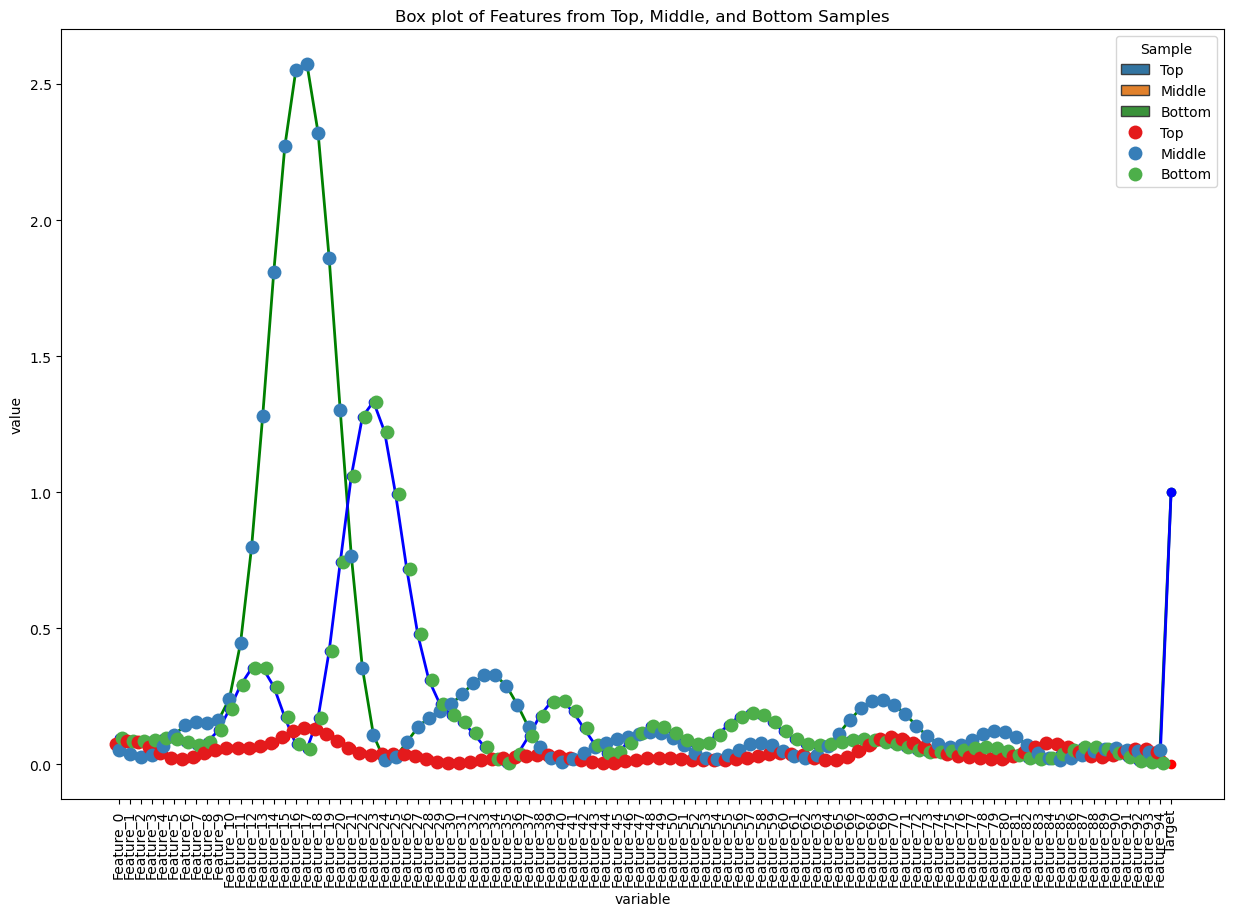

In [8]:
# 상위 지점, 중간 지점, 하위 지점에서 각각 1개씩 추출
top_data = shuffled_data.iloc[[0]]
middle_index = len(shuffled_data) // 3
middle_data = shuffled_data.iloc[[middle_index]]
bottom_data = shuffled_data.iloc[[-2]]

# 샘플에 대한 구분 추가
top_data.loc[:, 'Sample'] = 'Top'
middle_data.loc[:, 'Sample'] = 'Middle'
bottom_data.loc[:, 'Sample'] = 'Bottom'

# 결합된 데이터 프레임 생성
sampled_data = pd.concat([top_data, middle_data, bottom_data])

# 특징과 타겟 분리
X = sampled_data.drop(columns=['Target'])
y = sampled_data['Target']

print(X)
print(y)

# 상자 그림 시각화
plt.figure(figsize=(15, 10))
boxplot = sns.boxplot(data=pd.melt(sampled_data, id_vars=['Sample'], value_vars=X.columns), 
                      x='variable', y='value', hue='Sample')
sns.swarmplot(data=pd.melt(sampled_data, id_vars=['Sample'], value_vars=X.columns), 
              x='variable', y='value', hue='Sample', dodge=True, marker='o', size=10, palette='Set1')

# 각 샘플을 연결하는 선 추가
for sample, color in zip(['Top', 'Middle', 'Bottom'], ['r', 'g', 'b']):
    sample_data = sampled_data[sampled_data['Sample'] == sample].drop(columns=['Sample'])
    plt.plot(sample_data.T, marker='o', color=color, linestyle='-', linewidth=2)

plt.title('Box plot of Features from Top, Middle, and Bottom Samples')
plt.xticks(rotation=90)
plt.legend(title='Sample', loc='upper right')
plt.show()

In [10]:
# 결측치 처리
X.fillna(X.mean(), inplace=True)

# 데이터 정규화
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 신경망 모델 정의
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # 드롭아웃 추가
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

# 학습 결과 시각화 (Loss 트렌드와 정확도 트렌드)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Trend')
plt.legend()

plt.show()

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy:.2f}')

C:\Users\Leekanghyeon\AppData\Local\Temp\ipykernel_9600\1953465982.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(X.mean(), inplace=True)


ValueError: could not convert string to float: 'Top'

In [11]:
model.summary()

NameError: name 'model' is not defined